In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_cleaned = pd.read_csv("./data_export.csv", index_col="date")

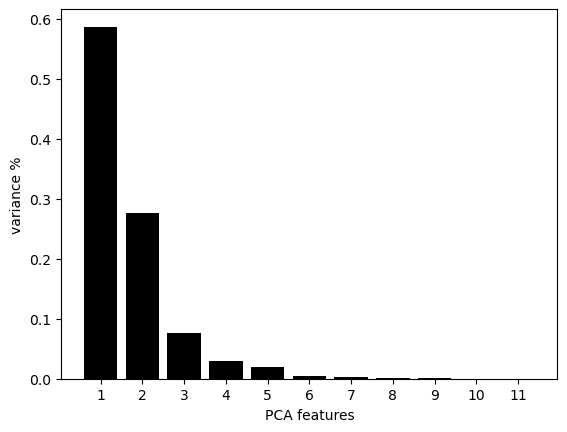

<Figure size 2000x200 with 0 Axes>

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_without = df_cleaned.drop(["is_systemic_crisis","month", "cpi_yoy_growthRate"], axis=1)

X = StandardScaler().fit_transform(X_without)

pca = PCA()
principalComponents = pca.fit_transform(X)

features_length = 12

features = range(1,features_length)
plt.bar(features, pca.explained_variance_ratio_[:features_length-1], color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.figure(figsize=(20, 2))

PCA_components = pd.DataFrame(principalComponents)

In [6]:
np.sum(pca.explained_variance_ratio_[:3])

0.9400204451530003

In [40]:
DIVIDE = 200
PCA_FEATURES = 3

Y_train = df_cleaned["is_systemic_crisis"][:DIVIDE]
X_train = principalComponents[:DIVIDE,:PCA_FEATURES]

Y_Gold = df_cleaned["is_systemic_crisis"][DIVIDE:]
X_Gold = principalComponents[DIVIDE:,:PCA_FEATURES]

In [41]:
Y_train.shape

(200,)

In [28]:
# Import necessary libraries
import logging

import os
from datetime import datetime
import tempfile

import matplotlib
import matplotlib.pyplot as plt
# import mlflow
# import mlflow.sklearn
import numpy as np
import pandas as pd
# import statsmodels.api as sm
# import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.neural_network import MLPRegressor
# from statsmodels.tsa.api import VAR

In [39]:
reg = KernelRidge(alpha=0.5)

reg = reg.fit(X_train, y=Y_train)

ValueError: Found input variables with inconsistent numbers of samples: [200, 257]

In [35]:
reg

KernelRidge(alpha=0.5)